### Description on the dataset
* describe the dataset
* give the URL of where to find the dataset and explain how to download it
* give at least two interesting questions you have about the data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

b. load the data into a pandas dataframe

In [29]:
data = pd.read_csv('data/rotten_tomatoes_movies.csv')

c. use pd.describe() to get a rough overview of the data

In [30]:
data.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


d. analyze your data using the following features
- print the array of columns and the index array
- create some simple plot of part of the data
- create a pivot table and plot some data from that pivot table
- use the groupby feature

d. (1) Analyze the data by printing the array of columns and the index array

In [31]:
data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

d. (2) Analyze the data by creating some simple plot of part of the data

<AxesSubplot:xlabel='audience_rating', ylabel='tomatometer_rating'>

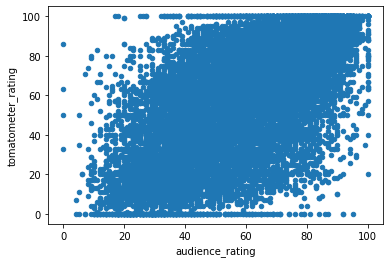

In [32]:
data.plot.scatter(x='audience_rating', y='tomatometer_rating')

e. create a discussion cell in which you discuss what your analysis tells you about the data

In [8]:
dire = data['directors'].unique()
len(dire)

8934

In [43]:
year = []
for i in data['original_release_date']:
    if type(i)!=str:
        year.append('')
    else:
        year.append(i[:4])

In [55]:
len(data)==len(year)

True

In [48]:
data['year']=year

In [63]:
data2 = pd.pivot_table(data, values='audience_count', index=['year'], columns=['production_company'])
data2

production_company,10 West Studios,101 Studios,108 Pics,1091,120 Degree Films,1428 Films,1821 Pictures,20th Century Fox,20th Century Fox Distribution,20th Century Fox Film,...,eOne Entertainment,eOne Entertainment Distribution,eRealBiz,iDreamMachine,iHQ,isotopefilms,levelFILM,nWave Pictures,s,truTV
year,,,,,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,258819.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2843.0,NaN,NaN
1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,NaN,NaN,NaN,190.0,55533.363636,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36379.750000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9904.166667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1219.0,NaN,NaN,NaN


In [62]:
# split each of the strings into a list
data['genres'] = data['genres'].str.split(pat=',')

# collect all unique tags from those lists
tags = set(data['genres'].explode().values)

# create a new Boolean column for each tag
for tag in tags:
    data[tag] = [tag in data['genres'].loc[i] for i in data.index]

display(data)

TypeError: argument of type 'float' is not iterable